<a href="https://colab.research.google.com/github/lily01awasthi/Gen_AI_For_Data_Engineering/blob/main/gen_ai_for_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gen AI for Data Analysis

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0273EN-SkillsNetwork/labs/v1/m2/data/ILPD.csv"

Direct_Bilirubin              0.246273
Total_Bilirubin               0.220218
Alkaline_Phosphotase          0.183363
Albumin and Globulin Ratio    0.163131
Alamine_Aminotransferase      0.163117
Name: Selector, dtype: float64


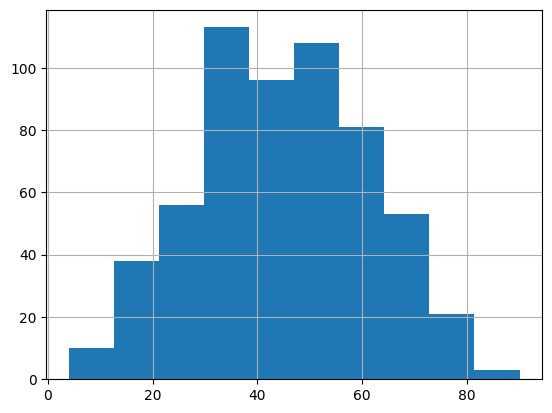

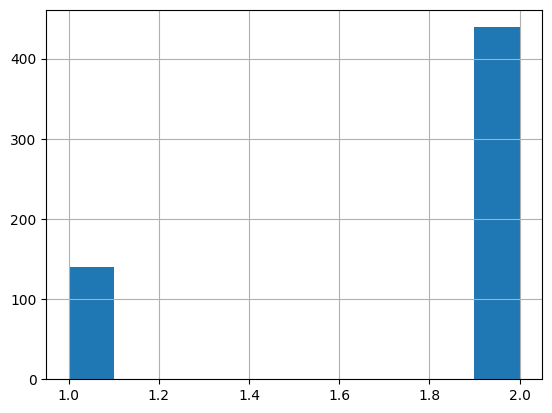

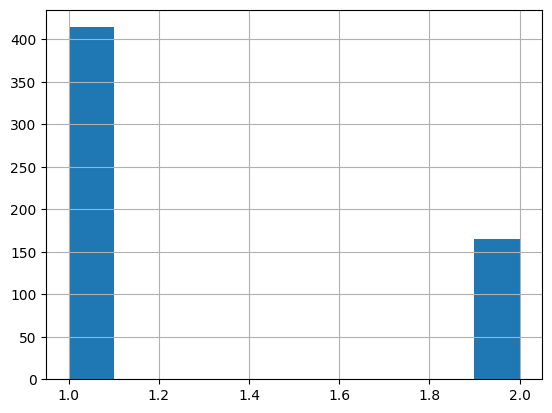

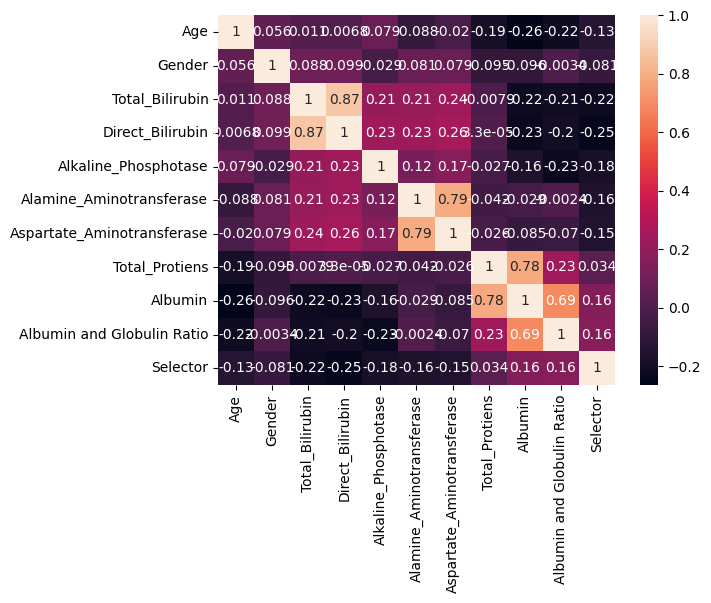

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV data into a pandas data frame
data = pd.read_csv(URL)

# Save histograms of data distribution for 'Age', 'Gender', and 'Selector'
plt.figure()
data['Age'].hist()
plt.savefig('age_histogram.png')

plt.figure()
data['Gender'].hist()
plt.savefig('gender_histogram.png')

plt.figure()
data['Selector'].hist()
plt.savefig('selector_histogram.png')

# Save correlation heatmap of the data set
plt.figure()
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.savefig('correlation_heatmap.png')

# Identify top 5 features with highest absolute correlation with 'Selector'
correlation_with_selector = corr['Selector'].abs().sort_values(ascending=False)
top_5_features = correlation_with_selector[1:6]
# Exclude 'Selector' itself
print(top_5_features)

# Gen AI for Data Mining

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Standard scaling on the top 5 attributes
scaler = StandardScaler()
top_5_attributes = data[top_5_features.index]
scaled_data = scaler.fit_transform(top_5_attributes)
scaled_data = pd.DataFrame(scaled_data, columns=top_5_attributes.columns)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(scaled_data, data['Selector'], test_size=0.2, random_state=42)

# Train and test classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Trees': DecisionTreeClassifier(),
    'Random Forests': RandomForestClassifier(),
    'Multi layer perceptron': MLPClassifier()
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy

# Create DataFrame for the results
results_df = pd.DataFrame(list(results.items()), columns=['Classifier', 'Accuracy'])
print(results_df)

               Classifier  Accuracy
0     Logistic Regression  0.620690
1                     KNN  0.646552
2             Naive Bayes  0.577586
3          Decision Trees  0.620690
4          Random Forests  0.637931
5  Multi layer perceptron  0.620690


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
